# Lecture8. Decision tree model

#### -목차-

[1. 실험환경 구성 (Experimental setting)](#1.-실험환경-구성-(Experimental-setting))  
[2. 데이터 불러오기 (Data loading)](#2.-데이터-불러오기-(Data-loading))  
>[데이터 확인](#데이터-확인)  
>[학습, 테스트 데이터 분리](#학습,-테스트-데이터-분리)  

[3. 의사결정나무 모델 구축 (Classification Tree)](#3.-의사결정나무-모델-구축-(Classification-Tree)) 
>[의사결정나무 모델 가시화](#의사결정나무-모델-가시화) 

[4. 의사결정나무 모델 테스트 ](#4.-의사결정나무-모델-테스트) 
>[Cross Validation](#Cross Validation)  

[5. 가지치기 수행 (Pruning phase)](#5.-가지치기-수행-(Pruning-phase)) 

# 1. 실험환경 구성 (Experimental setting)

In [20]:
# 라이브러리 로드
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')


# 2. 데이터 불러오기 (Data loading)

## 데이터 로드

In [6]:
cancer = load_breast_cancer()

## 학습, 테스트 데이터 분리

In [10]:
seed = 2021

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.7, random_state=seed)

# 3. 의사결정나무 모델 구축 (Classification Tree)

In [11]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

## 의사결정나무 모델 가시화

In [12]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


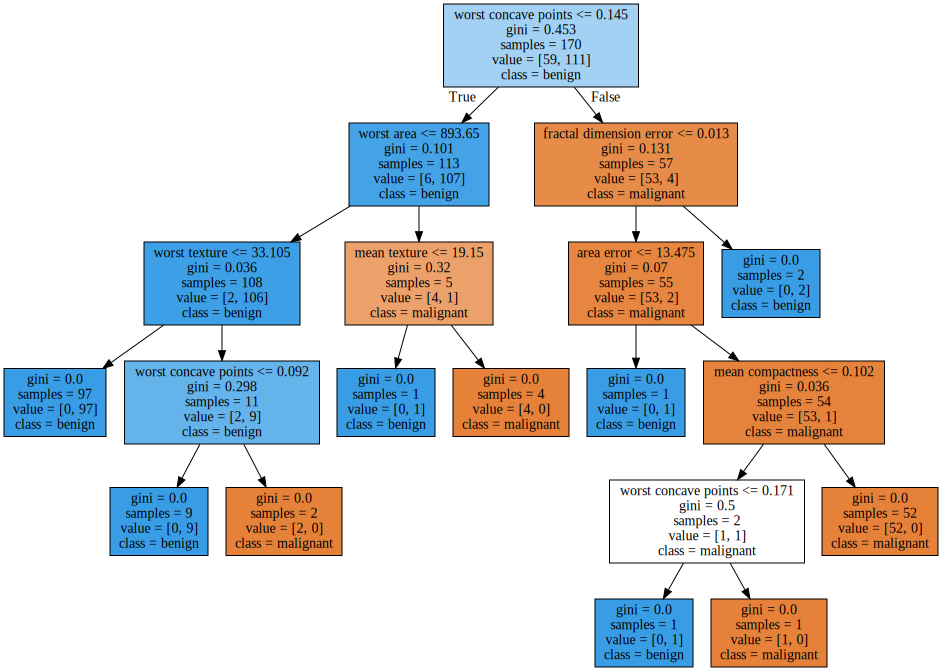

In [13]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

# 4. 의사결정나무 모델 테스트

In [14]:
y_pred = dt_clf.predict(x_test) 

In [19]:

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9298245614035088 

Accuracy:  0.93 

Recall:  0.98 

Precision:  0.92 

F1_score:  0.94 

Confusion Matrix: 
 [[131  22]
 [  6 240]]


# Cross Validation

In [21]:
# 교차검증

x = cancer.data
y = cancer.target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9173265020959478


In [22]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.012524,0.001327,0.912281
1,0.007604,0.000575,0.921053
2,0.007788,0.000490,0.921053
3,0.009310,0.000587,0.956140
4,0.010230,0.001003,0.876106


In [24]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9298245614035088

# 5. 가지치기 수행 (Pruning phase)

In [25]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("훈련 세트 정확도: {:.4f}".format(pruned_dt_clf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.4f}".format(pruned_dt_clf.score(x_test, y_test)))


훈련 세트 정확도: 0.9706
테스트 세트 정확도: 0.9424


> 가지치기 수행 전보다 test set에 대한 정확도가 향상됨을 확인할 수 있다. (0.9298 -> 0.9706)

In [28]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


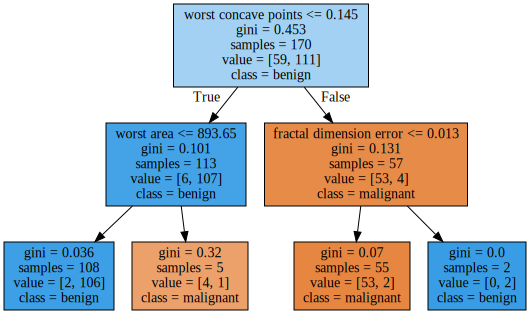

In [31]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)